In [1]:
import pandas as pd
dataset = pd.read_csv('car.csv')

In [2]:
dataset

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1695,low,low,4,more,med,low,unacc
1696,low,low,4,more,med,med,good
1697,low,low,4,more,med,high,vgood
1698,low,low,4,more,big,low,unacc


In [3]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# dataset = dataset.apply(le.fit_transform)

In [4]:
x = dataset.iloc[:, 0:6]
y = dataset.iloc[:, -1]

In [5]:
x

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1695,low,low,4,more,med,low
1696,low,low,4,more,med,med
1697,low,low,4,more,med,high
1698,low,low,4,more,big,low


In [6]:
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1695    unacc
1696     good
1697    vgood
1698    unacc
1699     good
Name: class, Length: 1700, dtype: object

In [7]:
X = x.values
Y = y.values

In [8]:
X

array([['vhigh', 'vhigh', '2', '2', 'small', 'low'],
       ['vhigh', 'vhigh', '2', '2', 'small', 'med'],
       ['vhigh', 'vhigh', '2', '2', 'small', 'high'],
       ...,
       ['low', 'low', '4', 'more', 'med', 'high'],
       ['low', 'low', '4', 'more', 'big', 'low'],
       ['low', 'low', '4', 'more', 'big', 'med']], dtype=object)

In [9]:
Y

array(['unacc', 'unacc', 'unacc', ..., 'vgood', 'unacc', 'good'],
      dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# dataset.apply(le.fit_transform)
# X[:, [0, 1, 4, 5]] = le.fit_transform(X[:, [0, 1, 4, 5]])
# X = le.fit_transform(X)
X[:, 0] = le.fit_transform(X[:, 0])
X[:, 1] = le.fit_transform(X[:, 1])
X[:, 2] = le.fit_transform(X[:, 2])
X[:, 3] = le.fit_transform(X[:, 3])
X[:, 4] = le.fit_transform(X[:, 4])
X[:, 5] = le.fit_transform(X[:, 5])

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)

In [12]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
Y = lb.fit_transform(Y)

In [13]:
Y

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0]])

In [14]:
X

array([[1.        , 1.        , 0.        , 0.        , 1.        ,
        0.5       ],
       [1.        , 1.        , 0.        , 0.        , 1.        ,
        1.        ],
       [1.        , 1.        , 0.        , 0.        , 1.        ,
        0.        ],
       ...,
       [0.33333333, 0.33333333, 0.66666667, 1.        , 0.5       ,
        0.        ],
       [0.33333333, 0.33333333, 0.66666667, 1.        , 0.        ,
        0.5       ],
       [0.33333333, 0.33333333, 0.66666667, 1.        , 0.        ,
        1.        ]])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [16]:
X_train.shape

(1360, 6)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [18]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=6, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='softmax'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [19]:
model.optimizer.get_config()

{'name': 'Adam',
 'learning_rate': 0.001,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                84        
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
Total params: 224
Trainable params: 224
Non-trainable params: 0
_________________________________________________________________


In [21]:
hist = model.fit(X_train, Y_train, epochs=100, batch_size=17)

Epoch 1/100
80/80 [==============================] - 0s 772us/step - loss: 0.6487 - accuracy: 0.3713
Epoch 2/100
80/80 [==============================] - 0s 873us/step - loss: 0.4906 - accuracy: 0.6993
Epoch 3/100
80/80 [==============================] - 0s 785us/step - loss: 0.4068 - accuracy: 0.7015
Epoch 4/100
80/80 [==============================] - 0s 860us/step - loss: 0.3722 - accuracy: 0.7015
Epoch 5/100
80/80 [==============================] - 0s 810us/step - loss: 0.3533 - accuracy: 0.7015
Epoch 6/100
80/80 [==============================] - 0s 810us/step - loss: 0.3402 - accuracy: 0.7015
Epoch 7/100
80/80 [==============================] - 0s 1000us/step - loss: 0.3294 - accuracy: 0.7051
Epoch 8/100
80/80 [==============================] - 0s 810us/step - loss: 0.3214 - accuracy: 0.7081
Epoch 9/100
80/80 [==============================] - 0s 835us/step - loss: 0.3144 - accuracy: 0.7110
Epoch 10/100
80/80 [==============================] - 0s 848us/step - loss: 0.3090 - accur

In [22]:
acc = hist.history['accuracy']
loss = hist.history['loss']

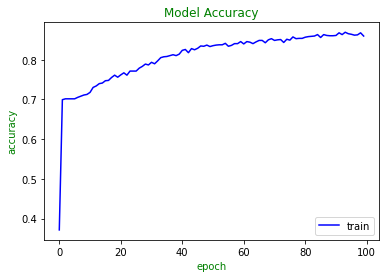

<Figure size 432x288 with 0 Axes>

In [23]:
from matplotlib import pyplot as plt
# plot training accuracy
plt.plot(acc, color='blue')
plt.title('Model Accuracy', color='green')
plt.ylabel('accuracy', color='green')
plt.xlabel('epoch', color='green')
plt.legend(['train'], loc='lower right')
plt.show()
plt.savefig('accuracy_curve.png')

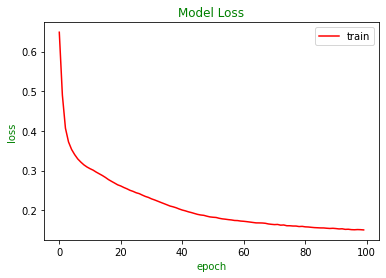

<Figure size 432x288 with 0 Axes>

In [24]:
# plot training loss
plt.plot(loss, color='red')
plt.title('Model Loss', color='green')
plt.ylabel('loss', color='green')
plt.xlabel('epoch', color='green')
plt.legend(['train'], loc='upper right')
plt.show()
plt.savefig('loss_curve.png')

In [25]:
history_test = model.evaluate(X_test, Y_test)

11/11 [==============================] - 0s 1ms/step - loss: 0.1740 - accuracy: 0.8353


In [26]:
history_test

[0.17397943139076233, 0.8352941274642944]